# Complex Null Hypothesis Significance Test

With [SciPy (Scientific Python)](https://www.scipy.org/)  we are able to make statistical analysis.

#### Learning objectives
 By the end of this notebook you will:
+ Calculate Pearson correlation.
+ Identify dependent and independent variables.
+ Interpret statistical results. 
---

## **1. Theory**

- Q1. In the figures below discuss whether or not these datasets would be suitable for a linear regression or correlation analysis:

![fig1.png](../figs/fig1.png)
![fig2.png](../figs/fig2.png)
![fig3.png](../figs/fig3.png)
![fig4.png](../figs/fig4.png)
![fig5.png](../figs/fig5.png)
![fig6.png](../figs/fig6.png)

- Q2. The model for a linear regression is described by the following formula:

$y_i = bx_i + c + \epsilon_i$

which describes the relationship between two variables $x$ and $y$ (the subscript $i$ is a variable that represents the index of a given data point). Can you see from the formula why this model is a _linear_ regression?

In linear regression, one variable is called independent and another is dependent. Just looking at how the formula is written;  

Which variable do you think is the dependent variable and which is the independent variable?

What are the other terms $b$, $c$ and $\epsilon_i$ ? 

- Q3. In the following picture, which regression line do you think best fits the data? How might you check?

![fig7.png](../figs/fig7.png)

## **2. Pearson's Correlation Test with Python**

- Pearson’s correlation coefficient, $\rho$, is a measure of the linear correlation (dependence) between two variables (e.g. X and Y)
- Its value is between +1 and −1 inclusive, where 1 is a total positive correlation, 0 is no correlation, and −1 is a negative correlation
- The hypothesis test explores whether if the value of the correlation coefficient $\rho$ is significantly distant from 0 (the closest to 0 the less correlated X and Y).
- If the test concludes that the correlation coefficient is significantly distant from 0, then we are able to say that "there is statistical evidence that X and Y are correlated" (this is not a causal result, the only association is proven)

In [9]:
from scipy import stats
import numpy as np

# Having X and Y vectors (dummy data)
X = np.array([0, 0, 0, 1, 1, 1, 1])
Y = np.arange(7)

# perform a pearson correlation test
stats.pearsonr(X, Y)

(0.8660254037844386, 0.011724811003954649)

As you noticed, the Pearson correlation coefficient function produces two outputs.
- The first output corresponds to the $\rho$ value
- You would interpret that X and Y are **highly positive** correlated since 0.86 is close to 0
- The second output refers to the p-value
- By convention, if the p-value is less than 0.05 then the test is significant


A good practice is to save the values in new Python objects, in this case since it's producing two outputs, therefore two objects can be assigned at. the same time on the left side of the equals sign

In [10]:
# perform a pearson correlation test
rho, p_value = stats.pearsonr(X, Y)

In [17]:
print(f'correlation coefficient: {round(rho,4)}')
print(f'p value: {round(p_value,4)}')

correlation coefficient: 0.866
p value: 0.0117


It is possible then to verify the linear relationship by plotng it

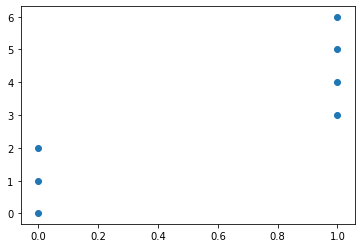

In [18]:
import matplotlib.pyplot as plt
plt.scatter(X,Y)

---

### Gapminder Dataset
In this real example, we'll examine how the Pearson Correlation coefficient (aka rho, or r) can be used to:
+ examine the relationships of pairs of variables and,
+ determine if they are statistically significant. 

Just like the previous tutorials, we’ll be using the Gapminder dataset, since it is large enough and diverse enough to be interesting, without being too complex, while it holds some meaningful information that can be insightful to people all over the globe).

**Step 1: Import the libraries:**

In [2]:
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns

**Q1. Add comments in the above code cell to explain why the selected libraries should be imported**

**Step 2: Load the Gapminder dataset**

You should now know how to load csv files into a dataframe, now do so for the Gapminder dataset.

https://raw.githubusercontent.com/MaastrichtU-IDS/global-studies/main/semester2/data/gapminder.csv

**Step 3: Explore Gapminder dataset**

**Q2. Which functions might you use to explore the Gapminder dataset? Demonstrate below**. 

**Q3. Compute the average (mean) life expectancy for the entire dataset. Then the same but for each continent**

+ Additionally, you can also compute the correlation between pairs of variables using [corrwith() function](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.corrwith.html):

In [52]:
df.corrwith(df['lifeExp']).sort_values(ascending=False) # set lifeExp as the 'target' variable

lifeExp      1.000000
gdpPercap    0.583706
year         0.435611
pop          0.064955
iso_num     -0.006535
dtype: float64

**Q4. Following the definition of the correlation coefficient, how would you interpret these values?**

+ Nevertheless, it seems like lifeExp is associated with gdpPercap. Let's create a scatter plot using matplotlib to further examine the relationship between these two continuous variables.

Text(0, 0.5, 'Life Expentancy')

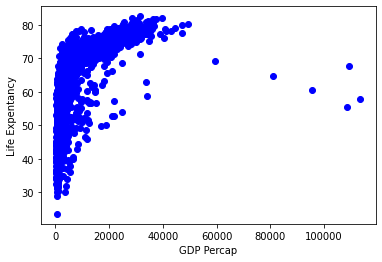

In [19]:
import matplotlib.pyplot as plt
plt.scatter(df["gdpPercap"], df["lifeExp"], color='blue')
plt.xlabel('GDP Percap')
plt.ylabel('Life Expentancy')

**Step 5. Perform a correlation analysis**

We can then confirm the numbers above and conduct the hypothesis test for Pearson correlation.

In [35]:
# perform a pearson correlation test
X = df['gdpPercap']
Y = df['lifeExp']
rho, p_value = stats.pearsonr(X, Y)
print(f'correlation coefficient: {round(rho,4)}')
print(f'p value: {round(p_value,4)}')

correlation coefficient: 0.5837
p value: 0.0


**Q5. Comment on the results. How suitable are these variable for analysing using linear correlation?**

**Q6. This association might be different per continent. Create a subset of the GapMinder dataset (e.g. Europe) and perform the correlation analysis**

## 3. Simple Regression (Linear Model)

Can we measure the effect of GDP on Life Expectancy?

**Step 1: Import library**

To implement a regression analysis, we can use the library [statsmodels](https://www.statsmodels.org/stable/index.html), to analyse, the dependence of two variables, e.g. the relation between Life expectancy and GDP. 
If the model fits correctly, we could predict life expectancy by year based on GDP.

In [45]:
# this is the standard import 
import statsmodels.formula.api as sm

**Step 2: Specify and fit the model**

In [53]:
# create a fitted model in one lin
model = sm.ols(formula = 'lifeExp ~ gdpPercap', data = df).fit() #Fit OLS Model

**Step 3: View results**

In [54]:

results = model.summary() #Get Results
print(results) # Print

#Hint: Use this Code in Your Function. 
#You will need to replace data = gapminder, with the data subset for a specific country.

                            OLS Regression Results                            
Dep. Variable:                lifeExp   R-squared:                       0.341
Model:                            OLS   Adj. R-squared:                  0.340
Method:                 Least Squares   F-statistic:                     879.6
Date:                Thu, 06 May 2021   Prob (F-statistic):          3.57e-156
Time:                        11:57:08   Log-Likelihood:                -6422.2
No. Observations:                1704   AIC:                         1.285e+04
Df Residuals:                    1702   BIC:                         1.286e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     53.9556      0.315    171.290      0.0

In [55]:
# print the coefficients
model.params

Intercept    53.955561
gdpPercap     0.000765
dtype: float64

**Step 4: Interpret results**

**How do we interpret the gdpPercap coefficient ($\beta_1$)?**

+ A "unit" increase in gdpPercap is associated with a 0.000765 "unit" increase in LifeExpectancy.

    - Or more clearly: An additional 1,000 dollars/euro on gdpPercap **is associated with** an increase in LifeExpectancy of 0.765 years.
    - Note that if an increase in gdpPercap was **associated with** a decrease in LifeExpectancy, $\beta_1$ would be negative.

**Step 5: Hypothesis Testing and p-values**

As you know already, closely related to confidence intervals is hypothesis testing. Generally speaking, you start with a null hypothesis and an alternative hypothesis. Then, you check whether the data support rejecting the null hypothesis or failing to reject the null hypothesis.

(Note that "failing to reject" the null is not the same as "accepting" the null hypothesis. The alternative hypothesis may indeed be true, except that you just don't have enough data to show that.)

As it relates to model coefficients, here is the conventional hypothesis test:

$H_0: \beta_1 = 0$   (There is no relationship between gdpPercap and LifeExpectancy)

$H_a: \beta_1 \neq 0$  (There is a relationship between gdpPercap and LifeExpectancy)


In [56]:
model.pvalues

Intercept     0.000000e+00
gdpPercap    3.565724e-156
dtype: float64

A p-value less than 0.05 is one way to decide whether there is likely a relationship between the feature and the response. (Again, using 0.05 as the cutoff is just a convention.)

In this case, the p-value for gdpPercap is far less than 0.05, and so we believe that there is a relationship between TV gdpPercap and LifeExpectancy.

Note that we generally ignore the p-value for the intercept.

**Q6: What is the relationship between year and life expectancy? Perform the necessary steps to examine such association.**

**Q7: (bonus) As you know already, the general trend is that over time life expectancy increases, but the trend is different for each country. Some experience a greater increase than others, whereas some countries experience declines in life expectancy. You can use whatever method you wish to assess and explain this relationship using Python.**

+ You could draw a graph
+ You could draw a graph which visualizes the differing relationships between countries
+ You could estimate a correlation coefficient
+ You could estimate a statistical model - note that the notebook as written uses Python 2. For the most part, it works with Python 3 though.
+ You could estimate a statistical model for each country